https://finance.naver.com/sise/sise_group_detail.nhn?type=upjong&no=35

In [1]:
import pandas as pd

In [2]:
url = "https://finance.naver.com/sise/sise_group_detail.nhn?type=upjong&no=35"

In [3]:
table = pd.read_html(url, encoding="cp949")
len(table)

3

In [4]:
df = table[2].dropna(how="all")
df = df.dropna(axis=1)
df.shape

(137, 9)

In [5]:
import datetime

today = datetime.datetime.today()
today = today.strftime("%Y-%m-%d")
today

'2020-10-02'

In [6]:
df["조회일자"] = today

In [7]:
df.head()

,종목명,현재가,전일비,등락률,매수호가,매도호가,거래량,거래대금,전일거래량,조회일자
1,이연제약,22000.0,3500.0,+18.92%,21950.0,22000.0,2349807.0,47960.0,120028.0,2020-10-02
2,명문제약,6980.0,840.0,+13.68%,6970.0,6980.0,45932406.0,331294.0,979474.0,2020-10-02
3,메드팩토 *,114000.0,9000.0,+8.57%,113900.0,114000.0,850028.0,95831.0,268177.0,2020-10-02
4,한미사이언스,58800.0,3700.0,+6.72%,58800.0,58900.0,532280.0,31236.0,139206.0,2020-10-02
5,일양약품우,106500.0,6000.0,+5.97%,106500.0,107000.0,8464.0,866.0,19805.0,2020-10-02


In [8]:
import matplotlib.pyplot as plt

plt.rc("font", family="AppleGothic")
plt.rc("axes", unicode_minus=False)
plt.style.use("ggplot")

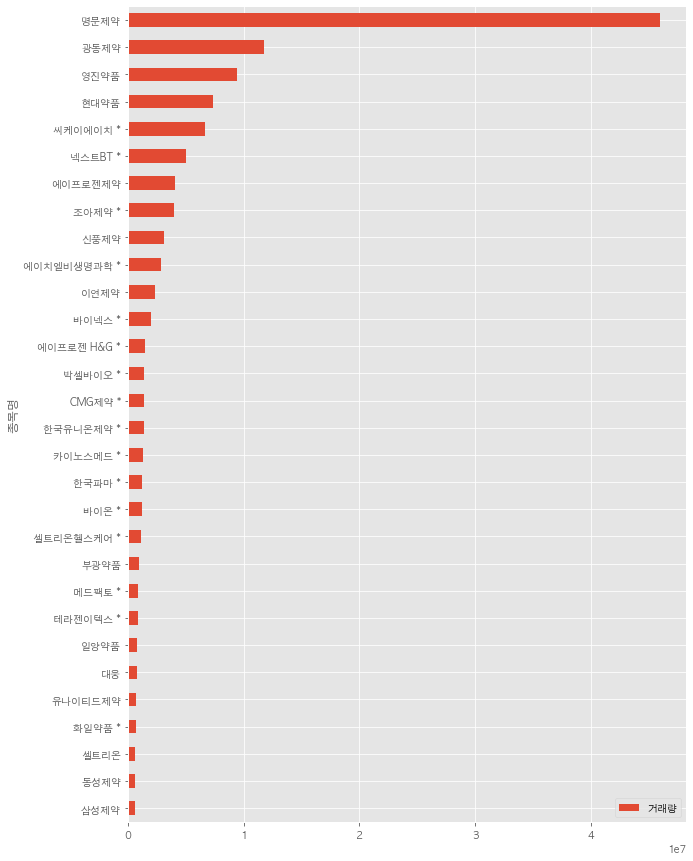

In [9]:
vol = df[["종목명", "거래량"]]
vol = vol.set_index("종목명")
vol.sort_values(by=["거래량"]).tail(30).plot.barh(figsize=(10, 15))

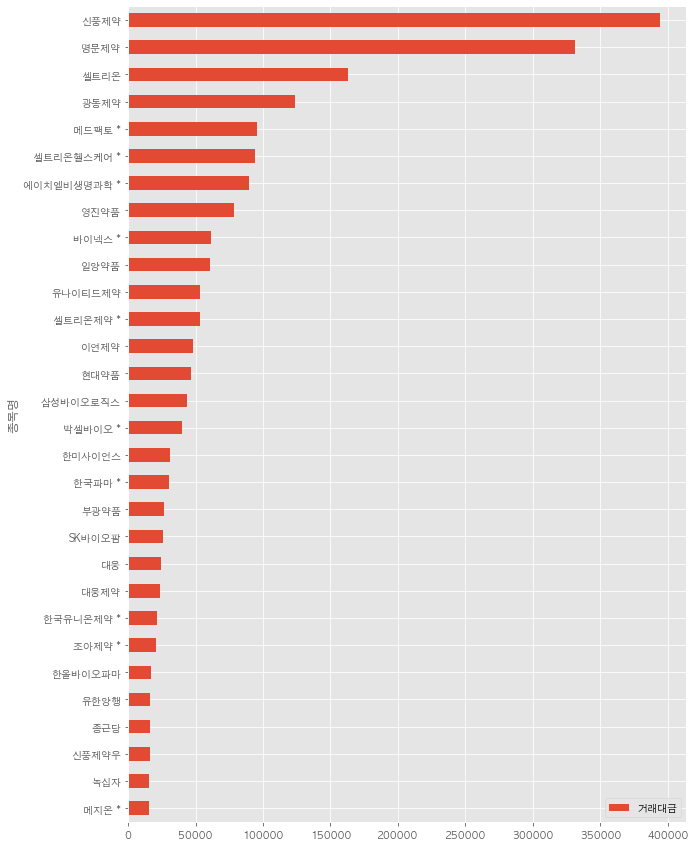

In [10]:
price = df[["종목명", "거래대금"]]
price = price.set_index("종목명")
price.sort_values(by=["거래대금"]).tail(30).plot.barh(figsize=(10, 15))

## 종목코드 수집

In [11]:
import requests
from bs4 import BeautifulSoup as bs

In [12]:
response = requests.get(url)

In [13]:
html = bs(response.text, "lxml")

In [14]:
table_2 = html.select("table")[2]

In [15]:
a_tags = table_2.select("a")

In [16]:
a_tags[0]["href"].split("=")[-1]

'102460'

In [17]:
item_list = []
for a_tag in a_tags:
    item_code = a_tag["href"].split("=")[-1]
    item_list.append(item_code)

In [18]:
df.shape

(137, 10)

In [19]:
item_code_list = pd.Series(item_list).drop_duplicates()
item_code_list = item_code_list.tolist()

In [20]:
len(item_code_list)

137

In [21]:
df["종목코드"] = item_code_list

In [22]:
df

,종목명,현재가,전일비,등락률,매수호가,매도호가,거래량,거래대금,전일거래량,조회일자,종목코드
1,이연제약,22000.0,3500.0,+18.92%,21950.0,22000.0,2349807.0,47960.0,120028.0,2020-10-02,102460
2,명문제약,6980.0,840.0,+13.68%,6970.0,6980.0,45932406.0,331294.0,979474.0,2020-10-02,017180
3,메드팩토 *,114000.0,9000.0,+8.57%,113900.0,114000.0,850028.0,95831.0,268177.0,2020-10-02,235980
4,한미사이언스,58800.0,3700.0,+6.72%,58800.0,58900.0,532280.0,31236.0,139206.0,2020-10-02,008930
5,일양약품우,106500.0,6000.0,+5.97%,106500.0,107000.0,8464.0,866.0,19805.0,2020-10-02,007575
...,...,...,...,...,...,...,...,...,...,...,...
133,JW중외제약우,61000.0,2500.0,-3.94%,60900.0,61000.0,3922.0,241.0,3523.0,2020-10-02,001065
134,JW중외제약2우B,82400.0,3600.0,-4.19%,82300.0,82400.0,2840.0,236.0,3470.0,2020-10-02,001067
135,신풍제약우,166500.0,8000.0,-4.58%,166500.0,167000.0,94155.0,15913.0,295098.0,2020-10-02,019175
136,신풍제약,126500.0,7000.0,-5.24%,126500.0,127000.0,3072500.0,393825.0,8123549.0,2020-10-02,019170


## 종목정보

In [24]:
item_url = f"https://finance.naver.com/item/main.nhn?code={item_code}"
item_url

'https://finance.naver.com/item/main.nhn?code=080720'

In [63]:
tables = pd.read_html(item_url, encoding="cp949")
len(tables)

13

In [75]:
tables[5]

,0,1
0,시가총액,"1,261 억원"
1,시가총액순위,코스닥 600위
2,상장주식수,7903728
3,액면가l매매단위,500원 l 1주


In [78]:
# 컬럼의 수가 2인 테이블만 따로 list로 생성
item_info = []
for table in tables:
    if table.shape[1] == 2:
        item_info.append(table)

In [81]:
# 리스트의 값 확인
item_info

[          0            1
 0      시가총액    1,261  억원
 1    시가총액순위     코스닥 600위
 2     상장주식수      7903728
 3  액면가l매매단위  500원  l  1주,
              0        1
 0  외국인한도주식수(A)  7903728
 1  외국인보유주식수(B)    29408
 2  외국인소진율(B/A)    0.37%,
            0                 1
 0  투자의견l목표주가       N/A  l  N/A
 1   52주최고l최저  25,360  l  7,806,
                    0                 1
 0   PERlEPS(2020.06)     N/A  l  -752원
 1          추정PERlEPS       N/A  l  N/A
 2  PBRlBPS (2020.06)  1.94배  l  8,212원
 3              배당수익률               NaN,
           0       1
 0  동일업종 PER  99.35배
 1  동일업종 등락률  +1.08%]

In [83]:
df_item = pd.concat(item_info)
df_item.set_index(0).T

,시가총액,시가총액순위,상장주식수,액면가l매매단위,외국인한도주식수(A),외국인보유주식수(B),외국인소진율(B/A),투자의견l목표주가,52주최고l최저,PERlEPS(2020.06),추정PERlEPS,PBRlBPS (2020.06),배당수익률,동일업종 PER,동일업종 등락률
1,"1,261 억원",코스닥 600위,7903728,500원 l 1주,7903728,29408,0.37%,N/A l N/A,"25,360 l 7,806",N/A l -752원,N/A l N/A,"1.94배 l 8,212원",NaN,99.35배,+1.08%


In [124]:
import time
def get_item_info(item_code):
    item_url = f"https://finance.naver.com/item/main.nhn?code={item_code}"
    tables = pd.read_html(item_url, encoding="cp949")
    # 컬럼의 수가 2인 테이블만 따로 list로 생성
    item_info = []
    for table in tables:
        if table.shape[1] == 2:
            item_info.append(table)
    df_item = pd.concat(item_info)
    df_item = df_item.set_index(0).T
    df_item["종목코드"] = item_code
    time.sleep(0.5)
    return df_item

In [125]:
get_item_info(item_code)

,시가총액,시가총액순위,상장주식수,액면가l매매단위,외국인한도주식수(A),외국인보유주식수(B),외국인소진율(B/A),투자의견l목표주가,52주최고l최저,PERlEPS(2020.06),추정PERlEPS,PBRlBPS (2020.06),배당수익률,동일업종 PER,동일업종 등락률,종목코드
1,"1,261 억원",코스닥 600위,7903728,500원 l 1주,7903728,29408,0.37%,N/A l N/A,"25,360 l 7,806",N/A l -752원,N/A l N/A,"1.94배 l 8,212원",NaN,99.35배,+1.08%,080720


In [131]:
from tqdm import tqdm, tqdm_pandas

tqdm_pandas(tqdm)


/Users/corazzon/opt/anaconda3/lib/python3.7/site-packages/tqdm/std.py:668: FutureWarning: The Panel class is removed from pandas. Accessing it from the top-level namespace will also be removed in the next version
  from pandas import Panel


In [132]:
result = df["종목코드"].progress_apply(get_item_info)

100%|██████████| 137/137 [01:39<00:00,  1.38it/s]


In [134]:
df_item_info = pd.concat(result.tolist())

In [136]:
df_info = df.merge(df_item_info)

In [137]:
df_info.shape

(137, 37)

In [138]:
df_info.head()

,종목명,현재가,전일비,등락률,매수호가,매도호가,거래량,거래대금,전일거래량,조회일자,...,PERlEPS(2020.05),PBRlBPS (2020.05),배당수익률l2019.11,PERlEPS(2020.03),PBRlBPS (2020.03),배당수익률l2020.06,PERlEPS(2019.12),PBRlBPS (2019.12),PERlEPS(2018.12),PBRlBPS (2018.12)
0,이연제약,22000.0,3500.0,+18.92%,21950.0,22000.0,2349807.0,47960.0,120028.0,2020-10-02,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,명문제약,6980.0,840.0,+13.68%,6970.0,6980.0,45932406.0,331294.0,979474.0,2020-10-02,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,메드팩토 *,114000.0,9000.0,+8.57%,113900.0,114000.0,850028.0,95831.0,268177.0,2020-10-02,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,한미사이언스,58800.0,3700.0,+6.72%,58800.0,58900.0,532280.0,31236.0,139206.0,2020-10-02,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,일양약품우,106500.0,6000.0,+5.97%,106500.0,107000.0,8464.0,866.0,19805.0,2020-10-02,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [141]:
df_info.columns

Index(['종목명', '현재가', '전일비', '등락률', '매수호가', '매도호가', '거래량', '거래대금', '전일거래량',
       '조회일자', '종목코드', '시가총액', '시가총액순위', '상장주식수', '액면가l매매단위', '외국인한도주식수(A)',
       '외국인보유주식수(B)', '외국인소진율(B/A)', '투자의견l목표주가', '52주최고l최저',
       'PERlEPS(2020.06)', '추정PERlEPS', 'PBRlBPS (2020.06)', '배당수익률l2019.12',
       '동일업종 PER', '동일업종 등락률', '배당수익률', 'PERlEPS(2020.05)',
       'PBRlBPS (2020.05)', '배당수익률l2019.11', 'PERlEPS(2020.03)',
       'PBRlBPS (2020.03)', '배당수익률l2020.06', 'PERlEPS(2019.12)',
       'PBRlBPS (2019.12)', 'PERlEPS(2018.12)', 'PBRlBPS (2018.12)'],
      dtype='object')

In [146]:
info_cols = ['종목명', '시가총액', '시가총액순위', '현재가', '전일비', '등락률', '매수호가', '매도호가', '거래량', '거래대금', '전일거래량',
       '조회일자', '종목코드', '상장주식수', '액면가l매매단위', '외국인한도주식수(A)',
       '외국인보유주식수(B)', '외국인소진율(B/A)', '투자의견l목표주가', '52주최고l최저',
       '동일업종 PER', '동일업종 등락률', '배당수익률']

In [149]:
df_info[info_cols].sort_values("시가총액순위")

,종목명,시가총액,시가총액순위,현재가,전일비,등락률,매수호가,매도호가,거래량,거래대금,...,상장주식수,액면가l매매단위,외국인한도주식수(A),외국인보유주식수(B),외국인소진율(B/A),투자의견l목표주가,52주최고l최저,동일업종 PER,동일업종 등락률,배당수익률
14,파마리서치프로덕트 *,"5,969 억원",코스닥 100위,62000.0,2300.0,+3.85%,62000.0,62100.0,56875.0,3483.0,...,9627643,500원 l 1주,9627643,873927,9.08%,"4.00매수 l 86,317","77,700 l 29,700",99.35배,+1.08%,NaN
58,대성미생물 *,612 억원,코스닥 1012위,16100.0,250.0,+1.58%,16100.0,16150.0,14778.0,237.0,...,3800000,500원 l 1주,3800000,87920,2.31%,N/A l N/A,"20,800 l 8,010",99.35배,+1.08%,NaN
120,큐브앤컴퍼니 *,528 억원,코스닥 1092위,1620.0,10.0,-0.61%,1620.0,1630.0,421248.0,682.0,...,32590313,500원 l 1주,32590313,323502,0.99%,N/A l N/A,"4,640 l 1,170",99.35배,+1.08%,NaN
105,내츄럴엔도텍 *,522 억원,코스닥 1100위,2525.0,0.0,0.00%,0.0,0.0,0.0,0.0,...,20665822,500원 l 1주,20665822,702098,3.40%,N/A l N/A,"7,460 l 2,360",99.35배,+1.08%,NaN
65,진바이오텍 *,489 억원,코스닥 1141위,5680.0,70.0,+1.25%,5680.0,5690.0,67987.0,382.0,...,8610587,500원 l 1주,8610587,164391,1.91%,N/A l N/A,"8,380 l 3,180",99.35배,+1.08%,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37,한미약품,"3조 2,391 억원",코스피 74위,273500.0,6500.0,+2.43%,273000.0,273500.0,45602.0,12435.0,...,11843029,"2,500원 l 1주",11843029,1679533,14.18%,"3.67매수 l 342,500","430,000 l 213,500",99.35배,+1.08%,NaN
96,유한양행우,766 억원,코스피 803위,64900.0,100.0,+0.15%,64800.0,64900.0,8739.0,565.0,...,1180940,"1,000원 l 1주",1180940,0,0.00%,"4.00매수 l 75,333","87,000 l 37,300",99.35배,+1.08%,NaN
84,녹십자,"2조 5,886 억원",코스피 87위,221500.0,1000.0,+0.45%,221500.0,222000.0,70881.0,15683.0,...,11686538,"5,000원 l 1주",11686538,2114987,18.10%,"3.67매수 l 208,333","318,000 l 97,400",99.35배,+1.08%,NaN
69,셀트리온,"34조 7,609 억원",코스피 8위,257500.0,2500.0,+0.98%,257500.0,258000.0,636839.0,162955.0,...,134993738,"1,000원 l 1주",134993738,28605951,21.19%,"3.92매수 l 371,769","339,500 l 138,500",99.35배,+1.08%,NaN


In [152]:
df_info.to_csv("pharm_stock.csv", index=False)

In [153]:
pd.read_csv("pharm_stock.csv")

,종목명,현재가,전일비,등락률,매수호가,매도호가,거래량,거래대금,전일거래량,조회일자,...,PERlEPS(2020.05),PBRlBPS (2020.05),배당수익률l2019.11,PERlEPS(2020.03),PBRlBPS (2020.03),배당수익률l2020.06,PERlEPS(2019.12),PBRlBPS (2019.12),PERlEPS(2018.12),PBRlBPS (2018.12)
0,이연제약,22000.0,3500.0,+18.92%,21950.0,22000.0,2349807.0,47960.0,120028.0,2020-10-02,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,명문제약,6980.0,840.0,+13.68%,6970.0,6980.0,45932406.0,331294.0,979474.0,2020-10-02,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,메드팩토 *,114000.0,9000.0,+8.57%,113900.0,114000.0,850028.0,95831.0,268177.0,2020-10-02,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,한미사이언스,58800.0,3700.0,+6.72%,58800.0,58900.0,532280.0,31236.0,139206.0,2020-10-02,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,일양약품우,106500.0,6000.0,+5.97%,106500.0,107000.0,8464.0,866.0,19805.0,2020-10-02,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
132,JW중외제약우,61000.0,2500.0,-3.94%,60900.0,61000.0,3922.0,241.0,3523.0,2020-10-02,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
133,JW중외제약2우B,82400.0,3600.0,-4.19%,82300.0,82400.0,2840.0,236.0,3470.0,2020-10-02,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
134,신풍제약우,166500.0,8000.0,-4.58%,166500.0,167000.0,94155.0,15913.0,295098.0,2020-10-02,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
135,신풍제약,126500.0,7000.0,-5.24%,126500.0,127000.0,3072500.0,393825.0,8123549.0,2020-10-02,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
